en el sigueinte codigo se creara la escenas de: crear_escena, cambiar_escena y dibijar_escena

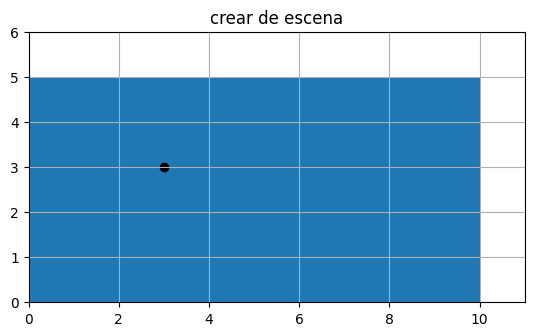

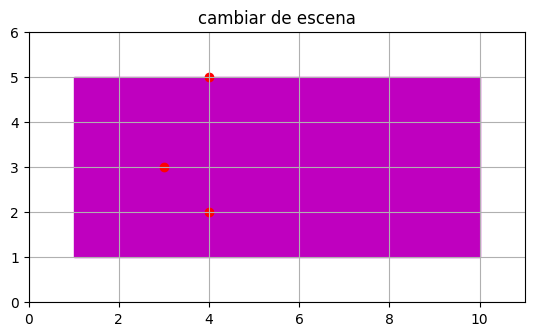

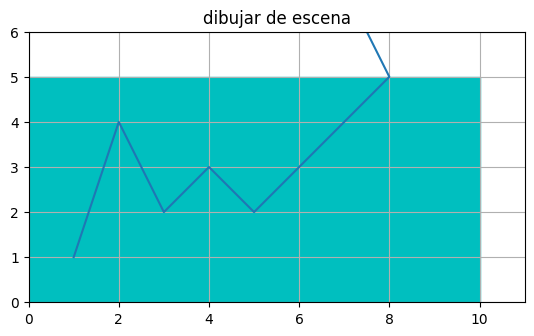

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

class Escena:
    def __init__(self, ancho, alto, rectangulo):
        self.ancho = ancho
        self.alto = alto


    def crear_escena(self):


        # Crear una figura y un eje para la gráfica
        fig, ax = plt.subplots()

        # color del rectángulo creado
        color_rentangulo = ('azure')

        # Definir los puntos del rectángulo, de donde iniciara el rectangulo que se crea
        p0 = (0, 0)
        p1 = (self.ancho, 0)
        p2 = (self.ancho, self.alto)
        p3 = (0, self.alto)


        # Graficar el rectángulo usando un polígono
        ax.fill([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]])

        # creacion del punto superpuesto
        ax.scatter(x=[3],y=[3], color='black')

        # Configuración para que la visualización sea más clara
        ax.set_aspect('equal', adjustable='box')  # Asegurar que el aspecto sea igual para x y y
        ax.set_xlim(0, self.ancho + 1)  # Límite en x
        ax.set_ylim(0, self.alto + 1)  # Límite en y
        plt.grid(True)  # Mostrar la cuadrícula
        plt.title("crear de escena")
        plt.show()

    def cambiar_escena(self):


        # Crear una figura y un eje para la gráfica
        fig, ax = plt.subplots()

        # color del rectángulo creado es cambiado
        color_rentangulo = ('m')

        # Definir los puntos del rectángulo
        #la posicion del rectangulo inicia desde las cordenadas 1,1
        p0 = (1, 1)
        p1 = (self.ancho, 1)
        p2 = (self.ancho, self.alto)
        p3 = (1, self.alto) # Vértices del rectángulo como puntos en forma de vectores



        # Graficar el rectángulo usando un polígono (para rellenarlo)
        ax.fill([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], color=color_rentangulo)

        # creacion de n puntos superpuestos  y se cambia el color
        ax.scatter(x=[4, 3, 4], y=[2,3, 5], color='red')

        # Configuración para que la visualización sea más clara
        ax.set_aspect('equal', adjustable='box')  # Asegurar que el aspecto sea igual para x y y
        ax.set_xlim(0, self.ancho + 1)  # Límite en x
        ax.set_ylim(0, self.alto + 1)  # Límite en y
        plt.grid(True)  # Mostrar la cuadrícula
        plt.title("cambiar de escena")
        plt.show()

    def dibujar_escena(self):

        fig, ax = plt.subplots()

        # color del rectángulo creado
        color_rentangulo = ('c')

        # Definir los puntos del rectángulo
        p0 = (0, 0)
        p1 = (self.ancho, 0)
        p2 = (self.ancho, self.alto)
        p3 = (0, self.alto) # Vértices del rectángulo como puntos en forma de vectores



        # Graficar el rectángulo usando un polígono (para rellenarlo)
        ax.fill([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], color=color_rentangulo)

        # Dibujar puntos adicionales
        # se crea una representacion grafica con las diferentes codenadas de los ejes X y Y
        ax.plot([1, 2, 3, 4, 5, 8, 6], [1, 4,  2, 3, 2, 5, 9])

        # Configuración para que la visualización sea más clara
        ax.set_aspect('equal', adjustable='box')  # Asegurar que el aspecto sea igual para x y y
        ax.set_xlim(0, self.ancho + 1)  # Límite en x
        ax.set_ylim(0, self.alto + 1)  # Límite en y
        plt.grid(True)  # Mostrar la cuadrícula
        plt.title("dibujar de escena")
        plt.show()


# Crear un rectángulo
rectangulo = Escena(10, 5, 5)
rectangulo.crear_escena()
rectangulo.cambiar_escena()
rectangulo.dibujar_escena()








A CONTINUACION SE CREA CODIGO PARA LA ANIMAZION DE DEZPLAZAMIENTO DE PUNTO USANDO LA LIBRERIA PYGAME

**PARA RECORDAR:**
En jupyter notebook no se pueden ver la animaciones toca demanera local

**CREACION DE LA ESCENA DESPLAZAR_PUNTO**

In [ ]:
import pygame
import sys
import numpy as np  # Importamos numpy para trabajar con vectores

pygame.init()

class Escena:
    def __init__(self, ancho, alto):
        self.ancho = ancho
        self.alto = alto
        self.posicion = np.array([ancho // 2, alto // 2])
        self.radio = 20
        self.color = (255, 0, 0)
        self.ventana = pygame.display.set_mode((ancho, alto))
        self.reloj = pygame.time.Clock()

    def desplazar_punto(self, direccion):

        movimiento = np.array([0, 0])

        if direccion == "izquierda":
            movimiento = np.array([-self.radio, 0])
        elif direccion == "derecha":
            movimiento = np.array([self.radio, 0])
        elif direccion == "arriba":
            movimiento = np.array([0, -self.radio])
        elif direccion == "abajo":
            movimiento = np.array([0, self.radio])

        # Verificamos que no se salga de los límites
        if 0 <= self.posicion[0] + movimiento[0] <= self.ancho - self.radio:
            self.posicion[0] += movimiento[0]

        if 0 <= self.posicion[1] + movimiento[1] <= self.alto - self.radio:
            self.posicion[1] += movimiento[1]

    def actualizar(self):

        self.ventana.fill((0, 0, 255))  # Rellenar con color azul
        pygame.draw.circle(self.ventana, (0, 255, 0), self.posicion, self.radio)
        pygame.display.flip()

    def manejar_eventos(self):

        for evento in pygame.event.get():
            if evento.type == pygame.QUIT:
                return False
            elif evento.type == pygame.KEYDOWN:
                if evento.key == pygame.K_LEFT:
                    self.desplazar_punto("izquierda")
                elif evento.key == pygame.K_RIGHT:
                    self.desplazar_punto("derecha")
                elif evento.key == pygame.K_UP:
                    self.desplazar_punto("arriba")
                elif evento.key == pygame.K_DOWN:
                    self.desplazar_punto("abajo")
        return True

def main():
    escena = Escena(640, 480)
    jugando = True

    while jugando:
        jugando = escena.manejar_eventos()
        escena.actualizar()
        escena.reloj.tick(60)

    pygame.quit()
    sys.exit()

if __name__ == "__main__":
    main()

**CREACION DE LA ESCENA_SIMILAR**

In [ ]:
import pygame
import sys
import random
import numpy as np  # Importamos numpy para manejar vectores

pygame.init()

class Escena:
    def __init__(self, ancho, alto, radio=20):
        self.ancho = ancho
        self.alto = alto
        self.radio = radio
        self.lista_coord = []
        self.color = (255, 0, 0)
        self.ventana = pygame.display.set_mode((ancho, alto))
        self.reloj = pygame.time.Clock()

        # Inicializamos las coordenadas de los círculos
        for _ in range(1):
            x = random.randint(0, ancho)
            y = random.randint(0, alto)
            self.lista_coord.append(np.array([x, y]))  # Usamos numpy array como vector

    def similar(self):

        for coord in self.lista_coord:
            # Extraemos las coordenadas del vector
            x, y = coord

            # Desplazamos el círculo hacia abajo (en el eje Y)
            coord[1] += self.radio

            # Si el círculo se sale de la pantalla, lo reiniciamos en la parte superior
            if coord[1] > self.alto:
                coord[1] = 0


    def dibujar(self):

        self.ventana.fill((0, 0, 255))  # Rellenar con color azul

        for coord in self.lista_coord:
            x, y = coord
            pygame.draw.circle(self.ventana, self.color, (x, y), self.radio)

        pygame.display.flip()

    def manejar_eventos(self):

        for evento in pygame.event.get():
            if evento.type == pygame.QUIT:
                return False
        return True

    def actualizar(self):

        self.similar()  # Mover los círculos
        self.dibujar()  # Dibujar la escena

def main():
    escena = Escena(300, 300)
    jugando = True

    while jugando:
        jugando = escena.manejar_eventos()
        escena.actualizar()
        escena.reloj.tick(5)  # Controla la velocidad de actualización

    pygame.quit()
    sys.exit()

if __name__ == "__main__":
    main()
